Importing essential libraries 

In [310]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns



Reading Abalone age dataset

In [311]:
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
df = pd.read_csv(file_path, header=None, names=column_names)
#To se how our table will construct 
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [313]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [314]:
df['Sex']=df['Sex'].astype('float')

In [315]:
df.describe()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


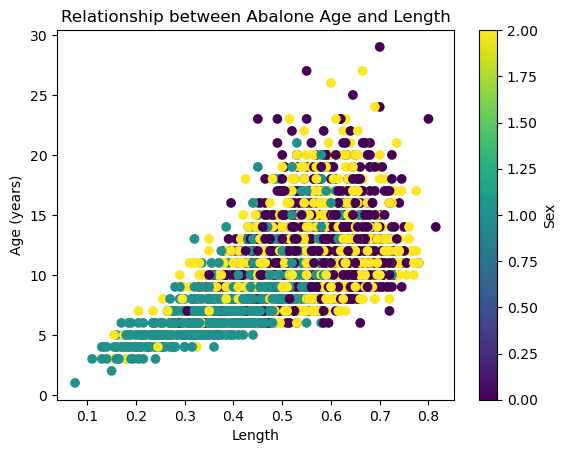

In [316]:

# Scatter plot using Matplotlib
plt.scatter(df['Length'], df['Rings'], c=df['Sex'], cmap='viridis')
plt.xlabel('Length')
plt.ylabel('Age (years)')
plt.title('Relationship between Abalone Age and Length')
plt.colorbar(label='Sex')
plt.show()


In [317]:
df.corr()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
WholeWeight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
ShuckedWeight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
VisceraWeight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
ShellWeight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


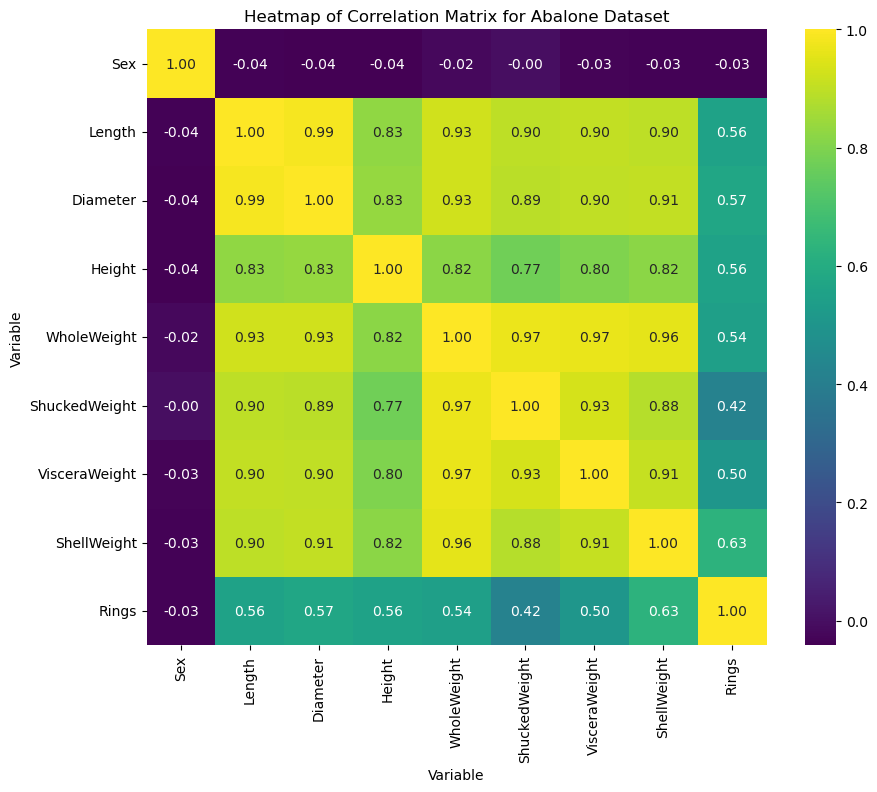

In [318]:

# Calculating the correlation matrix
corr_matrix = df.corr()

# Create a heatmap with using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap of Correlation Matrix for Abalone Dataset')
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.show()


In [319]:
X = df.drop('Rings', axis=1)
y = df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [320]:
import statsmodels.api as sm


X_train = sm.add_constant(X_train)  
model = sm.OLS(y_train, X_train).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     463.1
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:47:26   Log-Likelihood:                -7385.1
No. Observations:                3341   AIC:                         1.479e+04
Df Residuals:                    3332   BIC:                         1.484e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8671      0.313      9.160

In [321]:
model = LinearRegression()
model.fit(X_train, y_train)

# intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coefficient in zip(X.columns, model.coef_):
    print(f"{feature}: {coefficient}")

Intercept: 2.8671380390952974
Coefficients:
Sex: 0.0
Length: 0.08418963805175265
Diameter: -1.5394591763807748
Height: 13.597937549052894
WholeWeight: 11.448399957572592
ShuckedWeight: 9.157395815996091
VisceraWeight: -20.681024676674433
ShellWeight: -8.75282230902003


In [325]:
X_test = sm.add_constant(X_test) 

# Predict on the test data
y_pred = model.predict(X_test)

Mean Squared Error: 5.062537954095224
Root Mean Squared Error: 2.250008434227575
Mean Absolute Error: 1.6305613844193179
R Square: 0.5323381317508217


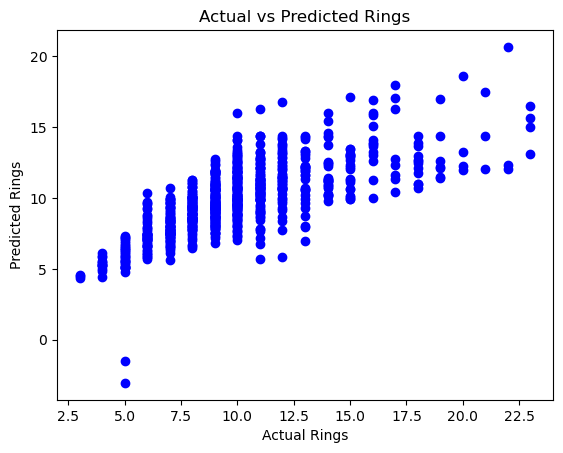

In [322]:


# the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R Square:", r2)

plt.scatter(y_test, y_pred, c='blue')
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title("Actual vs Predicted Rings")
plt.show()

In [323]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already trained the model and have X_test, y_test
X_test = sm.add_constant(X_test)  # Add a constant term if necessary

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R Square:", r2)


Mean Squared Error: 5.062537954095224
Root Mean Squared Error: 2.250008434227575
Mean Absolute Error: 1.6305613844193179
R Square: 0.5323381317508217


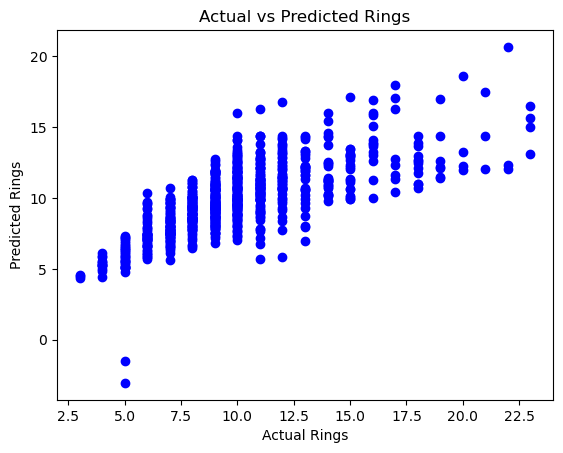

In [324]:
import matplotlib.pyplot as plt

# Assuming you want all dots to be of the same color, e.g., 'blue'
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title("Actual vs Predicted Rings")
plt.show()
